In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


 Attribute Information:
   1. Id number: 1 to 214
   2. RI: refractive index
   3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
   4. Mg: Magnesium
   5. Al: Aluminum
   6. Si: Silicon
   7. K: Potassium
   8. Ca: Calcium
   9. Ba: Barium
  10. Fe: Iron
  11. Type of glass: (class attribute)
      -- 1 building_windows_float_processed
      -- 2 building_windows_non_float_processed
      -- 3 vehicle_windows_float_processed
      -- 4 vehicle_windows_non_float_processed (none in this database)
      -- 5 containers
      -- 6 tableware
      -- 7 headlamps

In [116]:
glass_dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data")
glass_dataset.columns = (['Id', 'RI', 'Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'])
glass_dataset

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [117]:
glass_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [118]:
glass_dataset.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [119]:
df1 = glass_dataset.drop('Id' , axis="columns")
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [120]:
df1_input = df1.drop('Type of glass' , axis="columns")
df1_input.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [121]:
df1_values = df1['Type of glass']
df1_values.head()

0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1_input, df1_values, test_size = 0.3 , random_state=42)

In [123]:
y_train.head(10)


173    5
137    2
65     1
108    2
181    6
31     1
12     1
35     1
28     1
42     1
Name: Type of glass, dtype: int64

In [124]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [125]:
model.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [126]:
model.score(X_test,y_test)

0.65625

In [127]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [128]:
pipe.score(X_test,y_test)

0.6875

In [129]:
from sklearn.svm import SVC
pipe1 = make_pipeline(StandardScaler(), SVC())
pipe1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [130]:
pipe1.score(X_test,y_test)

0.6875

In [131]:
df1.describe( )

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [156]:
 df1.groupby('Type of glass')['Type of glass'].agg('count')



Type of glass
1    69
2    76
3    17
5    13
6     9
7    29
Name: Type of glass, dtype: int64

[Text(0.5, 0, 'Al')]

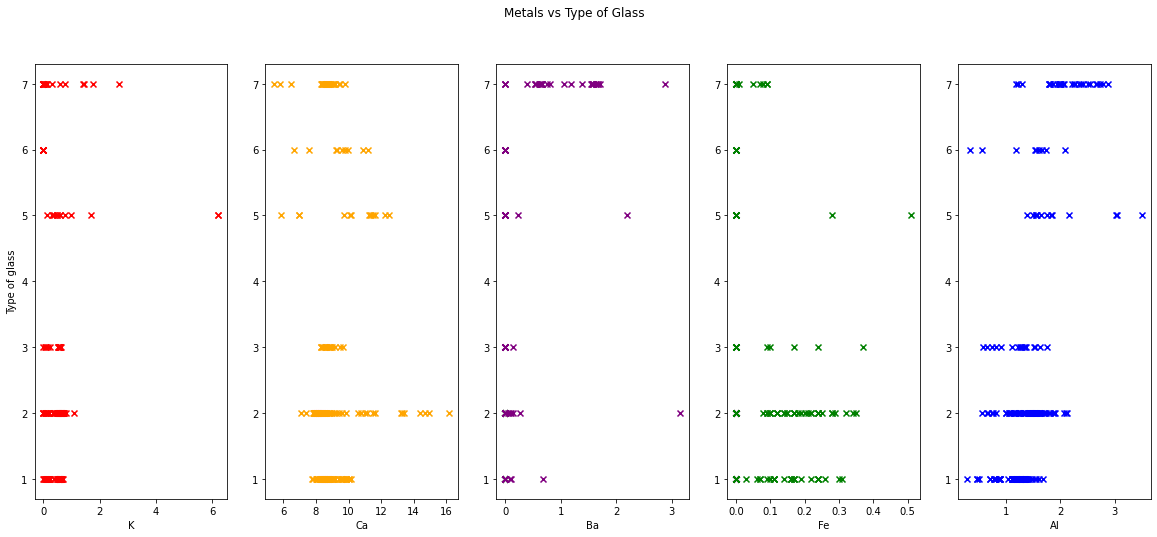

In [132]:
fig , (ax1, ax2,ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (20,8))
fig.suptitle('Metals vs Type of Glass')
ax1.scatter(df1.K,  df1['Type of glass'], c ="red" , marker="x" )
ax1.set(xlabel='K', ylabel='Type of glass')
ax2.scatter(df1.Ca,  df1['Type of glass'],c ="orange" , marker="x")
ax2.set(xlabel='Ca')

ax3.scatter(df1.Ba,  df1['Type of glass'], c ="purple" , marker="x")
ax3.set(xlabel='Ba')

ax4.scatter(df1.Fe,  df1['Type of glass'],c ="green" , marker="x")
ax4.set(xlabel='Fe')

ax5.scatter(df1.Al,  df1['Type of glass'],c ="blue" , marker="x")
ax5.set(xlabel='Al')


In [133]:
df2 = df1[(df1.K < 4) & (df1.Ca > 7 ) & (df1.Ca < 15 ) & (df1.Ba < 2) & (df1.Fe < 0.4) & (df1.Al < 3)]
df2


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [155]:
 df2.groupby('Type of glass')['Type of glass'].agg('count')


Type of glass
1    69
2    74
3    17
5     9
6     8
7    26
Name: Type of glass, dtype: int64

In [134]:
df2.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,1.518339,13.398768,2.754926,1.414236,72.709212,0.424236,8.988916,0.128916,0.055025,2.674877
std,0.002612,0.754274,1.396420,0.446591,0.652686,0.305374,1.234448,0.376641,0.091929,2.054387
min,1.512150,11.020000,0.000000,0.290000,70.260000,0.000000,7.080000,0.000000,0.000000,1.000000
25%,1.516550,12.915000,2.335000,1.190000,72.350000,0.125000,8.280000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.490000,1.360000,72.830000,0.550000,8.610000,0.000000,0.000000,2.000000
75%,1.519130,13.805000,3.610000,1.595000,73.100000,0.600000,9.165000,0.000000,0.100000,3.000000
max,1.527770,15.790000,3.980000,2.880000,75.180000,2.700000,14.960000,1.710000,0.370000,7.000000


[Text(0.5, 0, 'Si')]

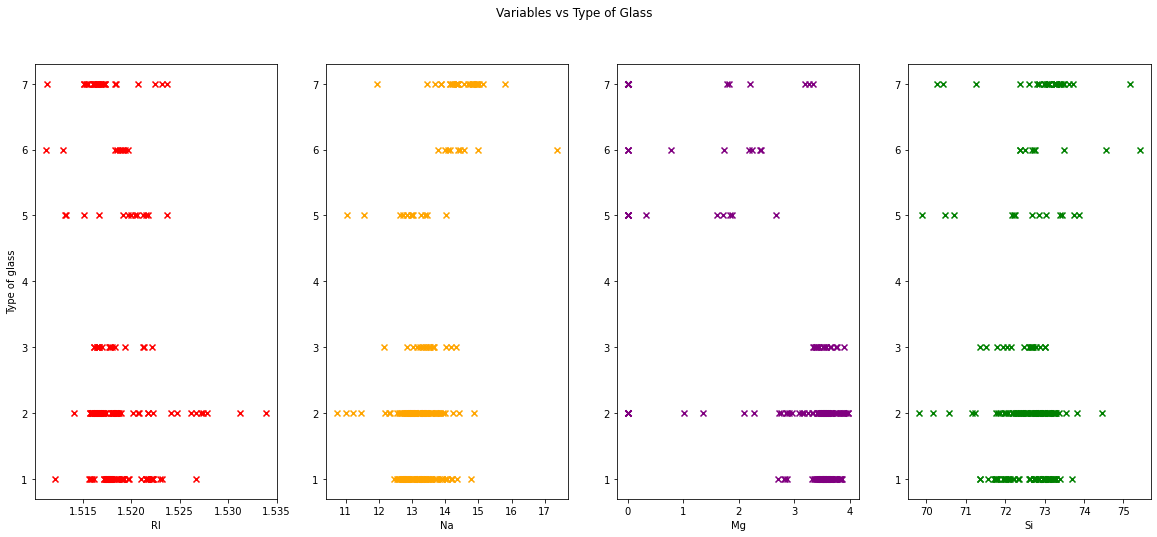

In [135]:
fig, (ax1, ax2,ax3, ax4) = plt.subplots(1, 4, figsize = (20,8))
fig.suptitle('Variables vs Type of Glass')
ax1.scatter(df1.RI,  df1['Type of glass'], c ="red" , marker="x" )
ax1.set(xlabel='RI', ylabel='Type of glass')
ax2.scatter(df1.Na,  df1['Type of glass'],c ="orange" , marker="x")
ax2.set(xlabel='Na')

ax3.scatter(df1.Mg,  df1['Type of glass'], c ="purple" , marker="x")
ax3.set(xlabel='Mg')

ax4.scatter(df1.Si,  df1['Type of glass'],c ="green" , marker="x")
ax4.set(xlabel='Si')




In [136]:
df3 = df2[(df2.RI > 1.510) & (df2.RI < 1.530) & (df2.Na > 12) & (df2.Na < 16) & (df2.Mg > 1.5) & (df2.Si > 71) & (df2.Si < 74) ]
df3

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
176,1.51937,13.79,2.41,1.19,72.76,0.00,9.77,0.00,0.00,6
177,1.51829,14.46,2.24,1.62,72.38,0.00,9.26,0.00,0.00,6
178,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6
186,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7


In [137]:
df3_input = df3.drop(['Type of glass'] , axis = "columns")
df3_values = df3["Type of glass"]

In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3_input, df3_values, test_size = 0.3 , random_state=1)

In [139]:
X_test.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
126,1.52081,13.78,2.28,1.43,71.99,0.49,9.85,0.00,0.17
75,1.51645,13.44,3.61,1.54,72.39,0.66,8.03,0.00,0.00
51,1.51808,13.43,2.87,1.19,72.84,0.55,9.03,0.00,0.00
31,1.51775,12.85,3.48,1.23,72.97,0.61,8.56,0.09,0.22
35,1.51909,13.89,3.53,1.32,71.81,0.51,8.78,0.11,0.00
40,1.51755,12.71,3.42,1.20,73.20,0.59,8.64,0.00,0.00
14,1.51761,12.81,3.54,1.23,73.24,0.58,8.39,0.00,0.00
118,1.51652,13.56,3.57,1.47,72.45,0.64,7.96,0.00,0.00
53,1.51778,13.21,2.81,1.29,72.98,0.51,9.02,0.00,0.09
159,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00


In [140]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7083333333333334

In [141]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC(kernel = "rbf"))
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.7708333333333334

In [142]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

pipe = make_pipeline (GaussianNB())
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.4791666666666667

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline (StandardScaler(), DecisionTreeClassifier())
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)


0.7916666666666666

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ADAb = AdaBoostClassifier(algorithm='SAMME', n_estimators=200, learning_rate=1)
ADAb.fit(X_train, y_train)
ADAb.score(X_test, y_test)

0.6666666666666666

In [165]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1, bootstrap= True, max_depth=5,  n_estimators= 110)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.8541666666666666

In [169]:
rfc = RandomForestClassifier(random_state = 1, bootstrap= True, max_depth=5,  n_estimators= 400)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.875

In [174]:
rfc = RandomForestClassifier(random_state = 1, bootstrap= False, max_depth=3,  n_estimators= 100)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.7916666666666666

In [166]:
rfc = RandomForestClassifier(random_state = 1, bootstrap= False, max_depth=5, n_estimators= 110)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.875

In [163]:
pipe_rfc = make_pipeline (StandardScaler(), rfc)
pipe_rfc.fit(X_train, y_train)
pipe_rfc.score(X_test,y_test)


0.875

In conclusion,
Random Forest Classifier turned out to be the best 
#Accuracy = 87.5%

## Best params = {random_state = 1, bootstrap= False, max_depth=5, n_estimators= 110}

